# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [131]:
# Import necessary libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# Setup device-agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [133]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start,end,step).unsqueeze(dim=1)
print(X.shape)

y = weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

torch.Size([100, 1])
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [134]:
# Split the data into training and testing
length = int(len(X) * 0.8)
print(length)
X_train = X[:length]
Y_train = y[:length]
X_test = X[length:]
Y_test = y[length:]

print(X_test.shape)

80
torch.Size([20, 1])


In [135]:
def plot_predictions(train_data, train_label, test_data, test_label, predictions=None):
    plt.figure(figsize=(10, 7))

    # Plot training data
    plt.scatter(train_data, train_label, c='b', s=4, label="Training Data")

    # Plot testing data
    plt.scatter(test_data, test_label, c='g', s=4, label="Testing Data")

    # Plot predictions, if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # Add legend
    plt.legend(prop={"size": 14})

    # Add labels and title
    plt.xlabel("Input Data")
    plt.ylabel("Target Data")
    plt.title("Training, Testing, and Predictions")

    # Show plot
    plt.show()


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [136]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(1,1)
    self.activation = nn.Sigmoid()

  def forward(self,x):
    return self.layer(x)


In [137]:
# Instantiate the model and put it to the target device
model = LinearRegressionModel()
model.to(device)

model.state_dict()

OrderedDict([('layer.weight', tensor([[-0.1517]])),
             ('layer.bias', tensor([0.6553]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [138]:
# Create the loss function and optimizer
fn_loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [139]:
# Train model for 500 epochs
epochs = 500

# Send data to target device
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in train mode
    model.train()

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = fn_loss(y_pred, Y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        # Put model in evaluation mode and setup inference context

        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate test loss
            test_loss = fn_loss(test_pred, Y_test)
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

        # Print out training and test losses
        print(f"Epoch: {epoch:03d} | Train Loss: {loss:.3f} | Test Loss: {test_loss:.3f}")


Epoch: 000 | Train Loss: 0.423 | Test Loss: 0.635
Epoch: 020 | Train Loss: 0.192 | Test Loss: 0.365
Epoch: 040 | Train Loss: 0.063 | Test Loss: 0.174
Epoch: 060 | Train Loss: 0.051 | Test Loss: 0.123
Epoch: 080 | Train Loss: 0.044 | Test Loss: 0.104
Epoch: 100 | Train Loss: 0.037 | Test Loss: 0.087
Epoch: 120 | Train Loss: 0.030 | Test Loss: 0.071
Epoch: 140 | Train Loss: 0.024 | Test Loss: 0.055
Epoch: 160 | Train Loss: 0.017 | Test Loss: 0.039
Epoch: 180 | Train Loss: 0.010 | Test Loss: 0.023
Epoch: 200 | Train Loss: 0.003 | Test Loss: 0.007
Epoch: 220 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 240 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 260 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 280 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 300 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 320 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 340 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 360 | Train Loss: 0.003 | Test Loss: 0.013
Epoch: 380 | Train Loss: 0.003 | Test Loss: 0.013


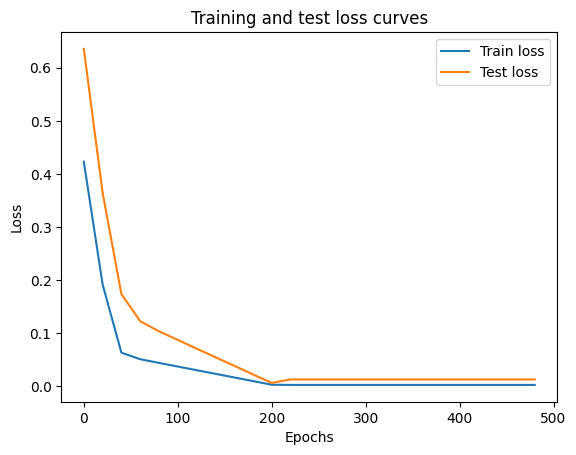

In [140]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

torch.Size([20, 1])
torch.Size([20, 1])


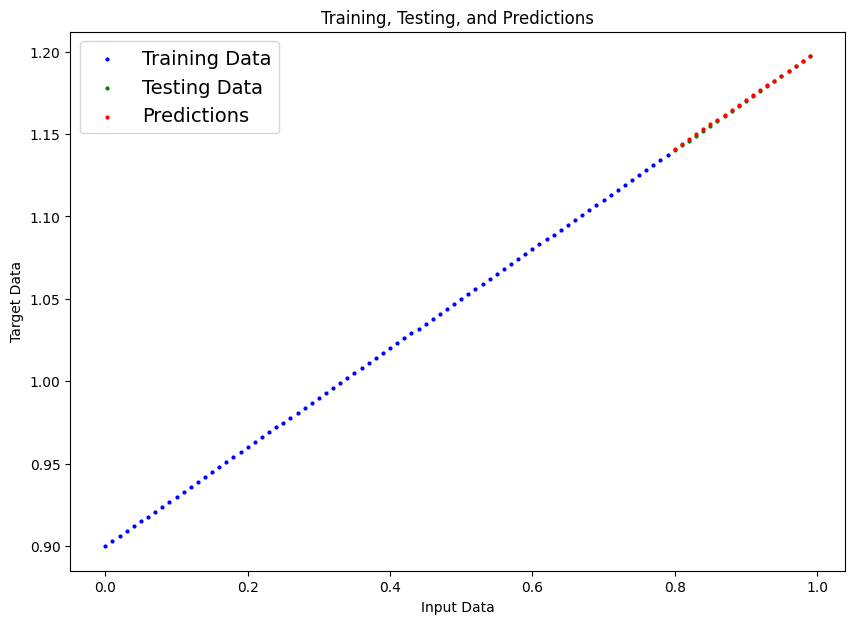

In [141]:
# Make predictions with the model
model.eval()
print(X_test.shape)
with torch.inference_mode():
  y_pred = model(X_test)
  print(y_preds.shape)
plot_predictions(train_data=X_train,train_label=Y_train,test_data=X_test, test_label=Y_test,predictions=y_pred)


In [142]:
# Plot the predictions (these may need to be on a specific device)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [145]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_model_0.pt"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)
# 2. Create model save path

# 3. Save the model state dict


Saving model to: models/pytorch_model_0.pt


In [146]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model1 = LinearRegressionModel()
model1.load_state_dict(torch.load(MODEL_SAVE_PATH))
model1.to(device)

<ipython-input-146-8de2338225ec>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
)

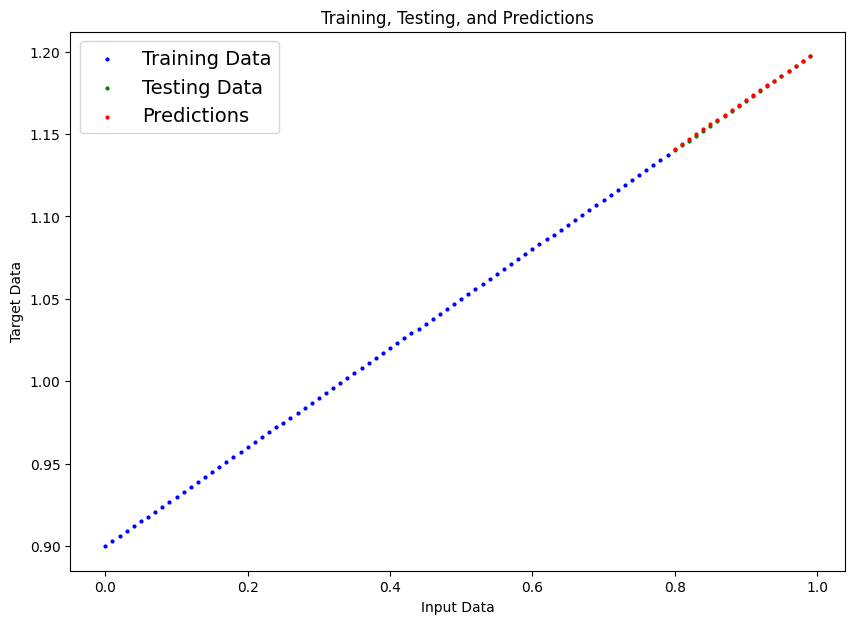

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [149]:
# Make predictions with loaded model and compare them to the previous
# Get predictions
new_pred = model1(X_test)

# Ensure that tensors are detached and converted to numpy arrays
plot_predictions(
    train_data=X_train.detach().numpy(),
    train_label=Y_train.detach().numpy(),
    test_data=X_test.detach().numpy(),
    test_label=Y_test.detach().numpy(),
    predictions=new_pred.detach().numpy()
)

print(new_pred == y_pred)
